## Descriptive Statistics

i.e. here, I perform an analysis of the hard evaluation dataset: what is it made up of? 
That is with regards to:
- with a certain type of quantifier? (all, exists) (is a certain type of quantifier harder?)
- with a certain number of keys? (generally -> or specifically: with a certain number of predicates? / constants?) (is more keys / predicates / constants harder?)
- with a certain number of constants?
- with a certain number of predicates?
- with a certain size of the world model? (is a bigger world model harder?)
- with a certain number of operators? (is more operators harder?)
- with a certain type of operator? (negation, implication, and-operator) -> especially: is there negation in front of quantifiers or not? // using only no operators vs. unary vs. binary operators // (is a certain type of operator harder (none, unary, binary)? is negation in front of quantifiers harder?)
- etc. (e.g. do the models tend to produce tautologies / contradictions?)




In [1]:
import json
import collections # See: https://stackoverflow.com/questions/2161752/how-to-count-the-frequency-of-the-elements-in-an-unordered-list 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
filename = 'base_pred_logic_data_hard.json'
base_dataset = pd.read_json('../datasets/' + filename)

In [3]:
# subset:
base_dataset = base_dataset.iloc[0:1000]
len(base_dataset)

1000

#### Descriptive Statistics

In [4]:
satCounts = base_dataset['Satisfied'].value_counts()
satCounts

Satisfied
unsatisfied    504
satisfied      496
Name: count, dtype: int64

In [5]:
base_dataset['Quantifiers']

0      ['all', 'exists']
1      ['all', 'exists']
2      ['all', 'exists']
3      ['all', 'exists']
4      ['all', 'exists']
             ...        
995    ['all', 'exists']
996    ['all', 'exists']
997    ['all', 'exists']
998    ['all', 'exists']
999    ['all', 'exists']
Name: Quantifiers, Length: 1000, dtype: object

In [6]:
# First: show descriptive statistics of evaluation dataset:
# number of quantifiers: all, exists
quantifiersCounts = base_dataset['Quantifiers'].value_counts()
quantifiersCounts


Quantifiers
['all', 'exists']    1000
Name: count, dtype: int64

In [7]:
# distribution of predicates
predicatesCounts = base_dataset['Predicates'].value_counts() # then add the singular F and G to one line
predicatesCounts

Predicates
[F, G]       231
[H, G]       231
[H, F, G]    220
[H, F]       210
[G]           43
[F]           36
[H]           29
Name: count, dtype: int64

In [8]:
# distribution of constants 
oldConstants = base_dataset['Names']
constants = []
for con in oldConstants:
    constants.append(len(con))
constantsCounts = collections.Counter(constants) # the keys() is what is counted, and the values() is the count
constantsCounts

Counter({10: 135,
         7: 109,
         9: 116,
         5: 97,
         1: 30,
         8: 126,
         3: 89,
         6: 123,
         2: 75,
         4: 100})

<Axes: xlabel='Number_of_constants'>

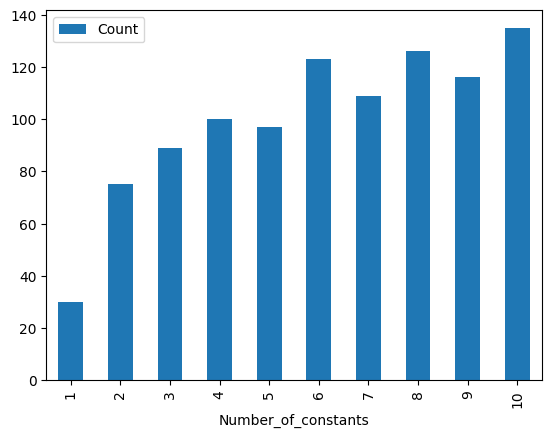

In [9]:
temp = pd.DataFrame(list(zip(constantsCounts.keys(), constantsCounts.values())), columns=['Number_of_constants','Count']).sort_values('Number_of_constants')
temp.plot(kind="bar", x = "Number_of_constants")

In [10]:
# distribution of keys
keys_list = base_dataset['Keys']
keysTemp = []
for keys in keys_list:
    keysTemp.append(keys.count(':'))
keysCounts = collections.Counter(keysTemp)
keysCounts

Counter({12: 112,
         11: 125,
         9: 113,
         8: 116,
         3: 34,
         7: 94,
         10: 122,
         5: 92,
         2: 7,
         13: 33,
         4: 56,
         6: 96})

<Axes: xlabel='Number_of_keys'>

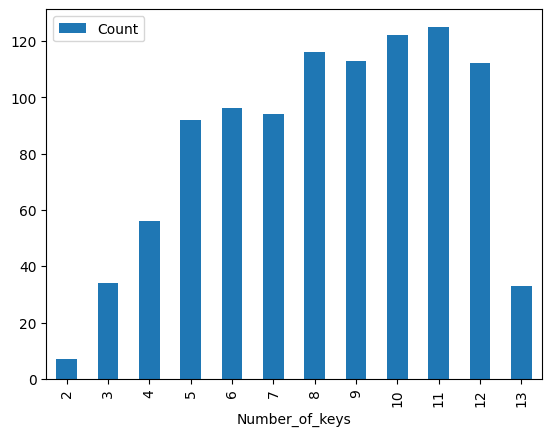

In [11]:
temp = pd.DataFrame(list(zip(keysCounts.keys(), keysCounts.values())), columns=['Number_of_keys','Count']).sort_values('Number_of_keys')
temp.plot(kind="bar", x = "Number_of_keys")

In [12]:
# distribution of world model size
worldModel_list = base_dataset['World Model']
wmTemp = []
for wm in worldModel_list:
    wmTemp.append(wm.count('.'))
worldModelCounts = collections.Counter(wmTemp)
worldModelCounts

Counter({20: 83,
         10: 88,
         14: 72,
         27: 29,
         15: 23,
         2: 34,
         18: 104,
         16: 83,
         24: 30,
         6: 90,
         1: 7,
         30: 33,
         12: 98,
         3: 9,
         4: 60,
         21: 28,
         8: 86,
         7: 9,
         9: 29,
         5: 5})

<Axes: xlabel='Number_of_Sentences'>

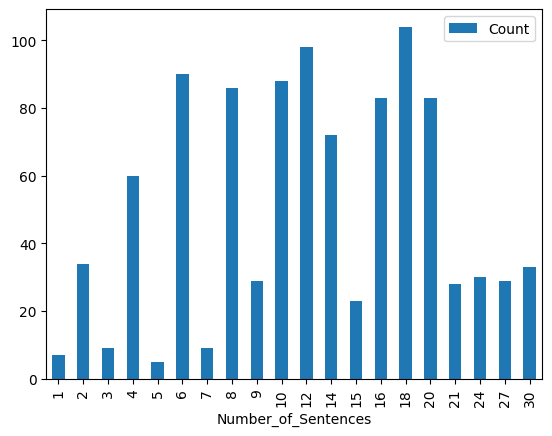

In [13]:
temp = pd.DataFrame(list(zip(worldModelCounts.keys(), worldModelCounts.values())), columns=['Number_of_Sentences','Count']).sort_values('Number_of_Sentences')
temp.plot(kind="bar", x = "Number_of_Sentences")

In [14]:
# generally: count all negations, implications, and-operators individually for each formula (string-find-count).
# from this deduce another list: total number of operators => plot this count. (is more operators harder?)
numNegations = []
numImplications = []
numAnds = []

formula_list = base_dataset['Formula']
for formula in formula_list:
    numNegations.append(formula.count("-"))
    numImplications.append(formula.count(">"))
    numAnds.append(formula.count("&"))

numTotalOperators = [a + b + c for (a, b, c) in zip(numNegations,numImplications,numAnds)]

In [15]:
negationCounts = collections.Counter(numNegations)
negationCounts

Counter({5: 225, 2: 107, 3: 223, 1: 25, 6: 104, 4: 273, 7: 34, 0: 6, 8: 3})

<Axes: xlabel='Number_of_Negations'>

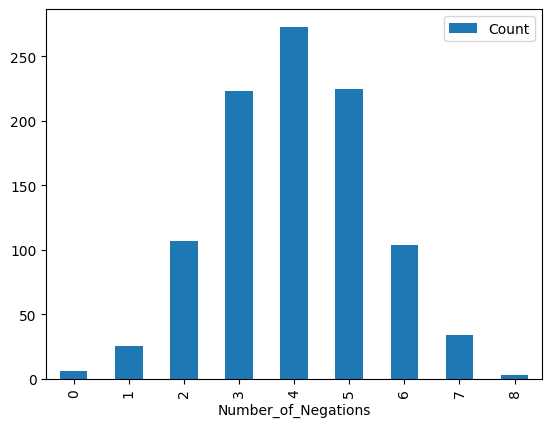

In [16]:
temp = pd.DataFrame(list(zip(negationCounts.keys(), negationCounts.values())), columns=['Number_of_Negations','Count']).sort_values('Number_of_Negations')
temp.plot(kind="bar", x = "Number_of_Negations")

In [17]:
implicationCounts = collections.Counter(numImplications)
implicationCounts

Counter({1: 533, 0: 255, 2: 212})

In [18]:
andCounts = collections.Counter(numAnds)
andCounts

Counter({1: 531, 2: 252, 0: 217})

In [19]:
totalOperatorCounts = collections.Counter(numTotalOperators)
totalOperatorCounts

Counter({7: 224, 4: 109, 5: 220, 3: 27, 8: 104, 6: 273, 9: 34, 2: 6, 10: 3})

<Axes: xlabel='Number_of_Operators'>

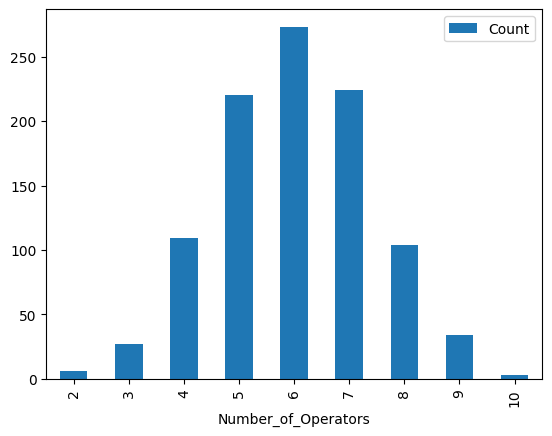

In [20]:
temp = pd.DataFrame(list(zip(totalOperatorCounts.keys(), totalOperatorCounts.values())), columns=['Number_of_Operators','Count']).sort_values('Number_of_Operators')
temp.plot(kind="bar", x = "Number_of_Operators")

In [22]:
# how many times there is negation in front of quantifiers vs. not (is negation in front of quantifiers harder?)
numNegationInFront = []
for formula in formula_list:
    if formula[0] == "-":
        numNegationInFront.append(True)
    else:
        numNegationInFront.append(False)
negationInFrontCounts = collections.Counter(numNegationInFront)
negationInFrontCounts

Counter({False: 499, True: 501})

In [23]:
# unary is negationCounts > 0 und implicationCounts == 0 und andCounts == 0.
# binary is negationCounts == 0 und implicationCounts > 0 oder andCounts > 0.
# unary + binary == 
unaryOperators = []
binaryOperators = []
unaryBinaryOperators = []
for nega, impl, andop in zip(numNegations, numImplications, numAnds):
    if nega > 0:
        binaryOperators.append(False)
        if impl == 0 and andop == 0:
            unaryOperators.append(True)
            unaryBinaryOperators.append(False)
        else:
            unaryOperators.append(False)
            unaryBinaryOperators.append(True)
    else:
        binaryOperators.append(True)
        unaryBinaryOperators.append(False)
        unaryOperators.append(False)

In [24]:
unaryOperatorsCounts = collections.Counter(unaryOperators)
unaryOperatorsCounts

Counter({False: 1000})

In [25]:
binaryOperatorsCounts = collections.Counter(binaryOperators)
binaryOperatorsCounts

Counter({False: 994, True: 6})

In [26]:
unaryBinaryOperatorsCounts = collections.Counter(unaryBinaryOperators)
unaryBinaryOperatorsCounts

Counter({True: 994, False: 6})

### Tautologies / Contradictions

In [27]:
import nltk
from nltk.inference.prover9 import BaseProverCommand, Prover, Prover9Command
from nltk.sem import Expression
from nltk.sem.logic import (
    AllExpression,
    AndExpression,
    EqualityExpression,
    ExistsExpression,
    Expression,
    IffExpression,
    ImpExpression,
    NegatedExpression,
    OrExpression,
)
from nltk import *
from nltk.sem.drt import DrtParser
from nltk.sem import logic

In [28]:
from timeout import timeout

In [34]:
@timeout(2)
def is_tautology(expression):
    # needs to be true, regardless of the input.
    # needs to be false when negated, regardless of the input.
    if ResolutionProver().prove(expression, [], verbose=True) and not ResolutionProver().prove(NegatedExpression(expression), [], verbose=True):
        return True
    else:
        return False

In [35]:
@timeout(2)
def is_contradiction(expression):
    # needs to be false, regardless of the input.
    # needs to be true when negated, regardless of the input.
    if not ResolutionProver().prove(expression, [], verbose=True) and ResolutionProver().prove(NegatedExpression(expression), [], verbose=True):
        return True
    else:
        return False

In [32]:
read_expr = Expression.fromstring

In [33]:
formula = read_expr(base_dataset["Formula"].iloc[20])
#formula = NegatedExpression(formula) # negating a contradiction makes it a tautology.
formula

<NegatedExpression -exists y.all x.-((G(x) -> G(x)) & G(y))>

In [ ]:
res = ResolutionProver().prove(formula, [], verbose=True)
res

Descriptive Statistics regarding tautologies

In [ ]:
numTautologies = []
numContradictions = []
timedout = []
for i in range(len(base_dataset)):
    try:
        formula = base_dataset['Formula'].iloc[i]
        numTautologies.append(is_tautology(read_expr(formula)))
        numContradictions.append(is_contradiction(read_expr(formula)))
    except:
        timedout.append(i)
    print("#####")
    print(i)

In [37]:
numTautologies = collections.Counter(numTautologies)
numTautologies

Counter({False: 851, True: 111})

In [38]:
numContradictions = collections.Counter(numContradictions)
numContradictions

Counter({True: 100, False: 833})

In [39]:
len(timedout)

67